<center><h1>1-c: SVM</h1></center>

<center><h2><a href="https://rdfia.github.io/">Course link</a></h2></center>

To keep your modifications in case you want to come back later to this colab, do *File -> Save a copy in Drive*.



In [1]:
!wget http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz

--2022-10-12 15:41:54--  http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz
Resolving webia.lip6.fr (webia.lip6.fr)... 132.227.201.33
Connecting to webia.lip6.fr (webia.lip6.fr)|132.227.201.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35952210 (34M) [text/plain]
Saving to: ‘15_scenes_Xy.npz’

15_scenes_Xy.npz    100%[===================>]  34.29M  20.6MB/s    in 1.7s    

2022-10-12 15:41:56 (20.6 MB/s) - ‘15_scenes_Xy.npz’ saved [35952210/35952210]



In [2]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split

Populating the interactive namespace from numpy and matplotlib


Loading BoW of the whole dataset (4485 images, thus 4485 dictionnary of 1001 words):

In [3]:
data = np.load("15_scenes_Xy.npz")
X = data["X"]
y = data["y"]

X.shape, y.shape

((4485, 1001), (4485,))

Let's see what is the class distribution:

In [4]:
{c: nb for c, nb in enumerate(np.bincount(y))}

{0: 241,
 1: 360,
 2: 328,
 3: 260,
 4: 308,
 5: 374,
 6: 410,
 7: 292,
 8: 356,
 9: 215,
 10: 216,
 11: 311,
 12: 210,
 13: 289,
 14: 315}

Split the dataset into a train & test set:

In [5]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

skf = StratifiedKFold(n_splits=5)
for train, test in skf.split(X, y):
  X_train = X[train]
  y_train = y[train]
  X_test = X[test]
  y_test = y[test]
  break

Then a validation set from the train set:

In [6]:
skf = StratifiedKFold(n_splits=5)
for train, valid in skf.split(X_train, y_train):
  X_train = X[train]
  y_train = y[train]
  X_valid = X[valid]
  y_valid = y[valid]
  break

In [7]:
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)

(2870, 1001) (2870,) (718, 1001) (718,) (897, 1001) (897,)


Let's hyperparameter gridsearch over different values of `C`:

In [ ]:
C_values = np.logspace(0.1, 3, num=10)
accuracies = []

for c in C_values:
  print(f'Training SVM with C={c}')

  clf = SVC(C=c)

  # Fit on sub-train set
  clf.fit(X_train, y_train)

  # Evaluate on val set
  acc = clf.score(X_valid, y_valid)
  accuracies.append(acc)

  print(f'--> accuracy = {acc}')

Training SVM with C=1.2589254117941673
--> accuracy = 0.5139275766016713
Training SVM with C=2.6437611857490992
--> accuracy = 0.5766016713091922
Training SVM with C=5.551935914386208
--> accuracy = 0.6350974930362117
Training SVM with C=11.659144011798316
--> accuracy = 0.66991643454039
Training SVM with C=24.484367468222267
--> accuracy = 0.6977715877437326
Training SVM with C=51.41751827683925
--> accuracy = 0.713091922005571
Training SVM with C=107.97751623277094
--> accuracy = 0.7158774373259053
Training SVM with C=226.7543125870802
--> accuracy = 0.7158774373259053
Training SVM with C=476.1872663008535
--> accuracy = 0.7158774373259053
Training SVM with C=1000.0
--> accuracy = 0.7158774373259053


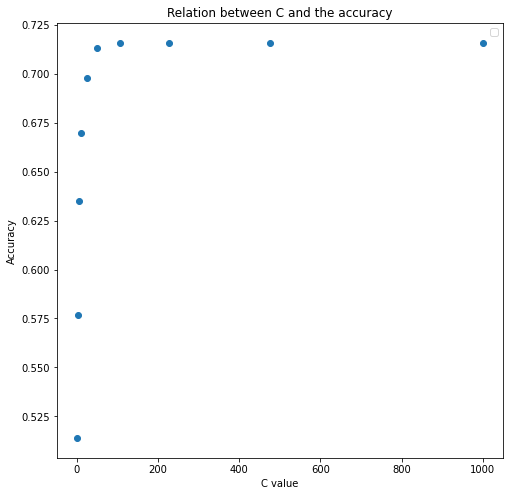

In [ ]:
# TODO plot the relation between `c` and the accuracy
plt.figure(figsize=(8,8))
plt.scatter(C_values, accuracies)
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Relation between C and the accuracy")
plt.show()

In [ ]:
clf = SVC(C=100)
clf.fit(X_train, y_train)
acc1 = clf.score(X_train, y_train)
acc2 = clf.score(X_valid, y_valid)
acc3 = clf.score(X_test, y_test)

print(acc1, acc2, acc3)

0.9996515679442509 0.7172701949860725 0.778149386845039


Do the same with different kernel values, and different decision functions:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

C_values = [100]
# C_values = np.logspace(0.1, 3, num=10)
# C_values = np.logspace(0.1, 2, num=10)
parameters = {'kernel':('linear', 'rbf', 'sigmoid', 'poly'), 'C':C_values, 'class_weight':[None, 'balanced'], 'decision_function_shape':['ovr', 'ovo']}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters, n_jobs=-1, verbose=3)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [100], 'class_weight': [None, 'balanced'],
                         'decision_function_shape': ['ovr', 'ovo'],
                         'kernel': ('linear', 'rbf', 'sigmoid', 'poly')},
             verbose=3)

In [ ]:
import pandas as pd

df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_decision_function_shape,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.619491,0.072563,0.902440,0.112144,100,None,ovr,linear,"{'C': 100, 'class_weight': None, 'decision_fun...",0.722997,0.733449,0.670732,0.705575,0.698606,0.706272,0.021636,5
1,3.195389,0.043474,1.870066,0.057925,100,None,ovr,rbf,"{'C': 100, 'class_weight': None, 'decision_fun...",0.716028,0.747387,0.681185,0.726481,0.705575,0.715331,0.021971,3
2,3.195234,0.078107,1.043676,0.055563,100,None,ovr,sigmoid,"{'C': 100, 'class_weight': None, 'decision_fun...",0.111498,0.132404,0.142857,0.135889,0.168990,0.138328,0.018555,13
3,2.973230,0.011076,0.749993,0.047067,100,None,ovr,poly,"{'C': 100, 'class_weight': None, 'decision_fun...",0.580139,0.590592,0.562718,0.564460,0.534843,0.566551,0.018905,9
4,3.556392,0.045258,0.818485,0.100204,100,None,ovo,linear,"{'C': 100, 'class_weight': None, 'decision_fun...",0.722997,0.733449,0.670732,0.705575,0.698606,0.706272,0.021636,5
5,3.206967,0.049078,1.834251,0.053989,100,None,ovo,rbf,"{'C': 100, 'class_weight': None, 'decision_fun...",0.716028,0.747387,0.681185,0.726481,0.705575,0.715331,0.021971,3
6,3.205816,0.113721,1.031223,0.076931,100,None,ovo,sigmoid,"{'C': 100, 'class_weight': None, 'decision_fun...",0.111498,0.132404,0.142857,0.135889,0.168990,0.138328,0.018555,13
7,2.958810,0.046925,0.769814,0.053353,100,None,ovo,poly,"{'C': 100, 'class_weight': None, 'decision_fun...",0.580139,0.590592,0.562718,0.564460,0.534843,0.566551,0.018905,9
8,3.573120,0.070165,0.833429,0.140133,100,balanced,ovr,linear,"{'C': 100, 'class_weight': 'balanced', 'decisi...",0.722997,0.733449,0.670732,0.705575,0.698606,0.706272,0.021636,5
9,3.206205,0.037337,1.816667,0.055414,100,balanced,ovr,rbf,"{'C': 100, 'class_weight': 'balanced', 'decisi...",0.717770,0.750871,0.682927,0.728223,0.705575,0.717073,0.022651,1


In [ ]:
clf.best_params_

{'C': 100,
 'class_weight': 'balanced',
 'decision_function_shape': 'ovr',
 'kernel': 'rbf'}

In [ ]:
clf.score(X_test, y_test)

0.778149386845039

In [ ]:
clf = SVC(C=100.0, kernel="rbf", class_weight="balanced", decision_function_shape="ovr")
clf.fit(X_train, y_train)
acc1 = clf.score(X_train, y_train)
acc2 = clf.score(X_valid, y_valid)
acc3 = clf.score(X_test, y_test)

print(acc1, acc2, acc3)

0.9986062717770035 0.7172701949860725 0.778149386845039


In [11]:
clf = SVC(C=100, kernel="linear", class_weight="balanced")
clf.fit(X_train, y_train)
acc1 = clf.score(X_train, y_train)
acc2 = clf.score(X_valid, y_valid)
acc3 = clf.score(X_test, y_test)

print(acc1, acc2, acc3)

0.9996515679442509 0.713091922005571 0.7759197324414716


In [9]:
clf = SVC(C=100, kernel="rbf", class_weight="balanced")
clf.fit(X_train, y_train)
acc1 = clf.score(X_train, y_train)
acc2 = clf.score(X_valid, y_valid)
acc3 = clf.score(X_test, y_test)

print(acc1, acc2, acc3)

0.9986062717770035 0.7172701949860725 0.778149386845039


In [10]:
clf = SVC(C=100, kernel="poly", class_weight="balanced")
clf.fit(X_train, y_train)
acc1 = clf.score(X_train, y_train)
acc2 = clf.score(X_valid, y_valid)
acc3 = clf.score(X_test, y_test)

print(acc1, acc2, acc3)

0.7919860627177701 0.5584958217270195 0.6231884057971014


In [12]:
clf = SVC(C=100, kernel="rbf", class_weight="balanced")
clf.fit(X_train, y_train)
acc1 = clf.score(X_train, y_train)
acc2 = clf.score(X_valid, y_valid)
acc3 = clf.score(X_test, y_test)

print(acc1, acc2, acc3)

0.9986062717770035 0.7172701949860725 0.778149386845039


In [13]:
clf = SVC(C=100, kernel="rbf", class_weight=None)
clf.fit(X_train, y_train)
acc1 = clf.score(X_train, y_train)
acc2 = clf.score(X_valid, y_valid)
acc3 = clf.score(X_test, y_test)

print(acc1, acc2, acc3)

0.9996515679442509 0.7172701949860725 0.778149386845039


In [16]:
diff_kernel = [[0.9996515679442509, 0.713091922005571, 0.7759197324414716], [0.9986062717770035, 0.7172701949860725, 0.778149386845039], [0.7919860627177701, 0.5584958217270195, 0.6231884057971014]]
diff_class_weight = [[0.9986062717770035, 0.7172701949860725, 0.778149386845039], [0.9996515679442509, 0.7172701949860725, 0.778149386845039]]

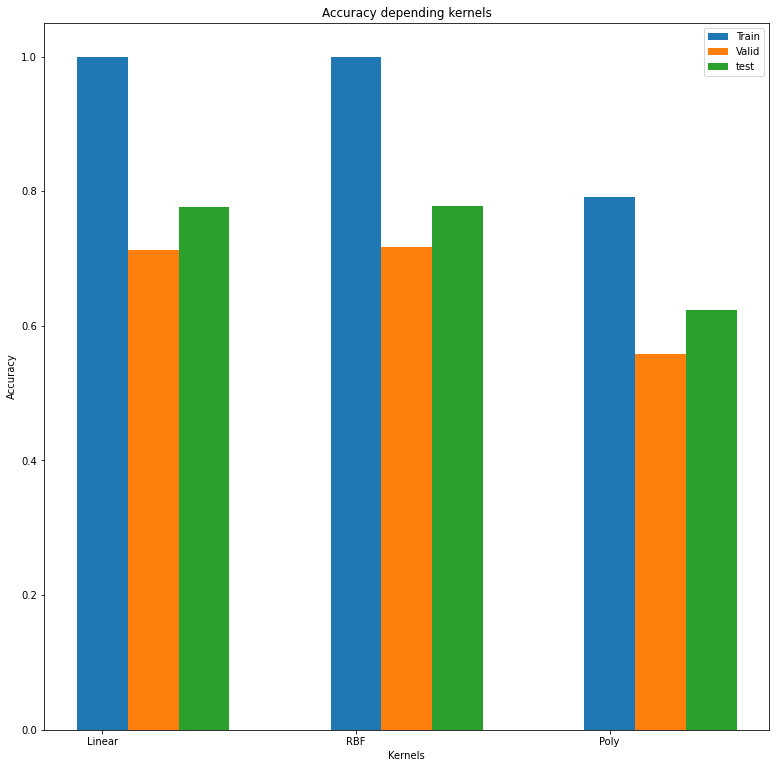

In [42]:
plt.figure(figsize=(13,13))

X_axis = np.arange(len(diff_kernel))

diff_kernel = np.array(diff_kernel).T
  
plt.bar(X_axis, diff_kernel[0], 0.2, label = 'Train')
plt.bar(X_axis + 0.2, diff_kernel[1], 0.2, label = 'Valid')
plt.bar(X_axis + 0.4, diff_kernel[2], 0.2, label = 'test')
  
plt.xticks(X_axis, ["Linear", "RBF", "Poly"])
plt.xlabel("Kernels")
plt.ylabel("Accuracy")
plt.title("Accuracy depending kernels")
plt.legend()
plt.show()

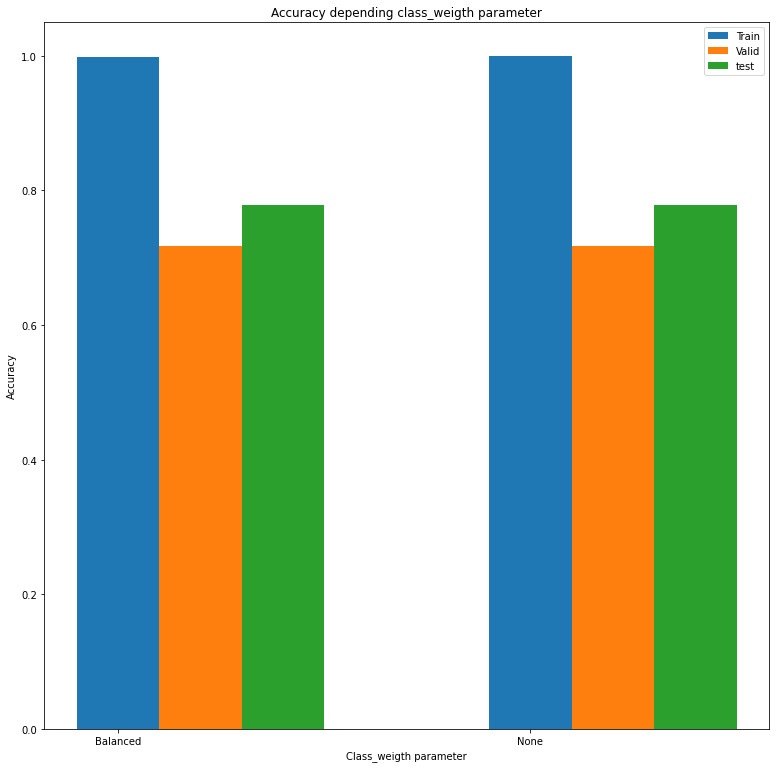

In [45]:
plt.figure(figsize=(13,13))

X_axis = np.arange(len(diff_class_weight))

diff_class_weight = np.array(diff_class_weight).T
  
plt.bar(X_axis, diff_class_weight[0], 0.2, label = 'Train')
plt.bar(X_axis + 0.2, diff_class_weight[1], 0.2, label = 'Valid')
plt.bar(X_axis + 0.4, diff_class_weight[2], 0.2, label = 'test')
  
plt.xticks(X_axis, ["Balanced", "None"])
plt.xlabel("Class_weigth parameter")
plt.ylabel("Accuracy")
plt.title("Accuracy depending class_weigth parameter")
plt.legend()
plt.show()